### 개선판 word2vec 학습

### CBOW 모델 구현

In [31]:
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss


class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')

        # 계층 생성
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)  # Embedding 계층 사용
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)

        # 모든 가중치와 기울기를 배열에 모은다.
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss

    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None


In [33]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.layers import *
from ch04.negative_sampling_layer import NegativeSamplingLoss


class SkipGram:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        W_in = 0.01 * rn(V, H).astype('f')
        W_out = 0.01 * rn(V, H).astype('f')

        # 계층 생성
        self.in_layer = Embedding(W_in)
        self.loss_layers = []
        for i in range(2 * window_size):
            layer = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
            self.loss_layers.append(layer)

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer] + self.loss_layers
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)

        loss = 0
        for i, layer in enumerate(self.loss_layers):
            loss += layer.forward(h, contexts[:, i])
        return loss

    def backward(self, dout=1):
        dh = 0
        for i, layer in enumerate(self.loss_layers):
            dh += layer.backward(dout)
        self.in_layer.backward(dh)
        return None


### CBOW 모델 학습 코드

| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 21 / 9295 | 시간 2[s] | 손실 4.16
| 에폭 1 |  반복 41 / 9295 | 시간 4[s] | 손실 4.15
| 에폭 1 |  반복 61 / 9295 | 시간 5[s] | 손실 4.13
| 에폭 1 |  반복 81 / 9295 | 시간 7[s] | 손실 4.05
| 에폭 1 |  반복 101 / 9295 | 시간 9[s] | 손실 3.94
| 에폭 1 |  반복 121 / 9295 | 시간 11[s] | 손실 3.79
| 에폭 1 |  반복 141 / 9295 | 시간 13[s] | 손실 3.64
| 에폭 1 |  반복 161 / 9295 | 시간 15[s] | 손실 3.49
| 에폭 1 |  반복 181 / 9295 | 시간 17[s] | 손실 3.35
| 에폭 1 |  반복 201 / 9295 | 시간 18[s] | 손실 3.26
| 에폭 1 |  반복 221 / 9295 | 시간 20[s] | 손실 3.18
| 에폭 1 |  반복 241 / 9295 | 시간 22[s] | 손실 3.08
| 에폭 1 |  반복 261 / 9295 | 시간 24[s] | 손실 3.03
| 에폭 1 |  반복 281 / 9295 | 시간 26[s] | 손실 2.96
| 에폭 1 |  반복 301 / 9295 | 시간 28[s] | 손실 2.91
| 에폭 1 |  반복 321 / 9295 | 시간 30[s] | 손실 2.88
| 에폭 1 |  반복 341 / 9295 | 시간 32[s] | 손실 2.85
| 에폭 1 |  반복 361 / 9295 | 시간 33[s] | 손실 2.80
| 에폭 1 |  반복 381 / 9295 | 시간 35[s] | 손실 2.79
| 에폭 1 |  반복 401 / 9295 | 시간 38[s] | 손실 2.73
| 에폭 1 |  반복 421 / 9295 | 시간 40[s] | 손실 2.78
| 에폭 1 |  반복 441 / 929

| 에폭 1 |  반복 3541 / 9295 | 시간 336[s] | 손실 2.40
| 에폭 1 |  반복 3561 / 9295 | 시간 337[s] | 손실 2.41
| 에폭 1 |  반복 3581 / 9295 | 시간 339[s] | 손실 2.44
| 에폭 1 |  반복 3601 / 9295 | 시간 341[s] | 손실 2.43
| 에폭 1 |  반복 3621 / 9295 | 시간 343[s] | 손실 2.41
| 에폭 1 |  반복 3641 / 9295 | 시간 345[s] | 손실 2.43
| 에폭 1 |  반복 3661 / 9295 | 시간 346[s] | 손실 2.43
| 에폭 1 |  반복 3681 / 9295 | 시간 348[s] | 손실 2.45
| 에폭 1 |  반복 3701 / 9295 | 시간 350[s] | 손실 2.41
| 에폭 1 |  반복 3721 / 9295 | 시간 352[s] | 손실 2.41
| 에폭 1 |  반복 3741 / 9295 | 시간 354[s] | 손실 2.41
| 에폭 1 |  반복 3761 / 9295 | 시간 356[s] | 손실 2.43
| 에폭 1 |  반복 3781 / 9295 | 시간 358[s] | 손실 2.45
| 에폭 1 |  반복 3801 / 9295 | 시간 360[s] | 손실 2.41
| 에폭 1 |  반복 3821 / 9295 | 시간 363[s] | 손실 2.42
| 에폭 1 |  반복 3841 / 9295 | 시간 365[s] | 손실 2.40
| 에폭 1 |  반복 3861 / 9295 | 시간 366[s] | 손실 2.40
| 에폭 1 |  반복 3881 / 9295 | 시간 368[s] | 손실 2.39
| 에폭 1 |  반복 3901 / 9295 | 시간 370[s] | 손실 2.40
| 에폭 1 |  반복 3921 / 9295 | 시간 372[s] | 손실 2.41
| 에폭 1 |  반복 3941 / 9295 | 시간 374[s] | 손실 2.41
| 에폭 1 |  반복 

| 에폭 1 |  반복 7041 / 9295 | 시간 703[s] | 손실 2.26
| 에폭 1 |  반복 7061 / 9295 | 시간 706[s] | 손실 2.24
| 에폭 1 |  반복 7081 / 9295 | 시간 708[s] | 손실 2.25
| 에폭 1 |  반복 7101 / 9295 | 시간 710[s] | 손실 2.30
| 에폭 1 |  반복 7121 / 9295 | 시간 713[s] | 손실 2.30
| 에폭 1 |  반복 7141 / 9295 | 시간 715[s] | 손실 2.28
| 에폭 1 |  반복 7161 / 9295 | 시간 717[s] | 손실 2.28
| 에폭 1 |  반복 7181 / 9295 | 시간 720[s] | 손실 2.29
| 에폭 1 |  반복 7201 / 9295 | 시간 722[s] | 손실 2.26
| 에폭 1 |  반복 7221 / 9295 | 시간 725[s] | 손실 2.30
| 에폭 1 |  반복 7241 / 9295 | 시간 727[s] | 손실 2.30
| 에폭 1 |  반복 7261 / 9295 | 시간 730[s] | 손실 2.31
| 에폭 1 |  반복 7281 / 9295 | 시간 732[s] | 손실 2.28
| 에폭 1 |  반복 7301 / 9295 | 시간 735[s] | 손실 2.28
| 에폭 1 |  반복 7321 / 9295 | 시간 737[s] | 손실 2.27
| 에폭 1 |  반복 7341 / 9295 | 시간 740[s] | 손실 2.26
| 에폭 1 |  반복 7361 / 9295 | 시간 742[s] | 손실 2.29
| 에폭 1 |  반복 7381 / 9295 | 시간 745[s] | 손실 2.27
| 에폭 1 |  반복 7401 / 9295 | 시간 747[s] | 손실 2.28
| 에폭 1 |  반복 7421 / 9295 | 시간 750[s] | 손실 2.26
| 에폭 1 |  반복 7441 / 9295 | 시간 752[s] | 손실 2.28
| 에폭 1 |  반복 

| 에폭 2 |  반복 1241 / 9295 | 시간 1045[s] | 손실 2.15
| 에폭 2 |  반복 1261 / 9295 | 시간 1046[s] | 손실 2.17
| 에폭 2 |  반복 1281 / 9295 | 시간 1048[s] | 손실 2.15
| 에폭 2 |  반복 1301 / 9295 | 시간 1050[s] | 손실 2.17
| 에폭 2 |  반복 1321 / 9295 | 시간 1052[s] | 손실 2.11
| 에폭 2 |  반복 1341 / 9295 | 시간 1053[s] | 손실 2.15
| 에폭 2 |  반복 1361 / 9295 | 시간 1055[s] | 손실 2.13
| 에폭 2 |  반복 1381 / 9295 | 시간 1057[s] | 손실 2.17
| 에폭 2 |  반복 1401 / 9295 | 시간 1059[s] | 손실 2.20
| 에폭 2 |  반복 1421 / 9295 | 시간 1061[s] | 손실 2.15
| 에폭 2 |  반복 1441 / 9295 | 시간 1062[s] | 손실 2.12
| 에폭 2 |  반복 1461 / 9295 | 시간 1064[s] | 손실 2.15
| 에폭 2 |  반복 1481 / 9295 | 시간 1066[s] | 손실 2.16
| 에폭 2 |  반복 1501 / 9295 | 시간 1068[s] | 손실 2.13
| 에폭 2 |  반복 1521 / 9295 | 시간 1069[s] | 손실 2.11
| 에폭 2 |  반복 1541 / 9295 | 시간 1071[s] | 손실 2.15
| 에폭 2 |  반복 1561 / 9295 | 시간 1073[s] | 손실 2.14
| 에폭 2 |  반복 1581 / 9295 | 시간 1075[s] | 손실 2.18
| 에폭 2 |  반복 1601 / 9295 | 시간 1076[s] | 손실 2.08
| 에폭 2 |  반복 1621 / 9295 | 시간 1078[s] | 손실 2.12
| 에폭 2 |  반복 1641 / 9295 | 시간 1080[s] | 

| 에폭 2 |  반복 4661 / 9295 | 시간 1348[s] | 손실 2.10
| 에폭 2 |  반복 4681 / 9295 | 시간 1350[s] | 손실 2.07
| 에폭 2 |  반복 4701 / 9295 | 시간 1352[s] | 손실 2.10
| 에폭 2 |  반복 4721 / 9295 | 시간 1353[s] | 손실 2.10
| 에폭 2 |  반복 4741 / 9295 | 시간 1355[s] | 손실 2.07
| 에폭 2 |  반복 4761 / 9295 | 시간 1357[s] | 손실 2.08
| 에폭 2 |  반복 4781 / 9295 | 시간 1359[s] | 손실 2.10
| 에폭 2 |  반복 4801 / 9295 | 시간 1360[s] | 손실 2.14
| 에폭 2 |  반복 4821 / 9295 | 시간 1362[s] | 손실 2.06
| 에폭 2 |  반복 4841 / 9295 | 시간 1364[s] | 손실 2.06
| 에폭 2 |  반복 4861 / 9295 | 시간 1366[s] | 손실 2.11
| 에폭 2 |  반복 4881 / 9295 | 시간 1368[s] | 손실 2.11
| 에폭 2 |  반복 4901 / 9295 | 시간 1369[s] | 손실 2.04
| 에폭 2 |  반복 4921 / 9295 | 시간 1371[s] | 손실 2.07
| 에폭 2 |  반복 4941 / 9295 | 시간 1373[s] | 손실 2.06
| 에폭 2 |  반복 4961 / 9295 | 시간 1375[s] | 손실 2.10
| 에폭 2 |  반복 4981 / 9295 | 시간 1376[s] | 손실 2.05
| 에폭 2 |  반복 5001 / 9295 | 시간 1378[s] | 손실 2.07
| 에폭 2 |  반복 5021 / 9295 | 시간 1380[s] | 손실 2.07
| 에폭 2 |  반복 5041 / 9295 | 시간 1382[s] | 손실 2.06
| 에폭 2 |  반복 5061 / 9295 | 시간 1383[s] | 

| 에폭 2 |  반복 8081 / 9295 | 시간 1652[s] | 손실 2.04
| 에폭 2 |  반복 8101 / 9295 | 시간 1653[s] | 손실 2.07
| 에폭 2 |  반복 8121 / 9295 | 시간 1655[s] | 손실 2.05
| 에폭 2 |  반복 8141 / 9295 | 시간 1657[s] | 손실 2.02
| 에폭 2 |  반복 8161 / 9295 | 시간 1659[s] | 손실 2.02
| 에폭 2 |  반복 8181 / 9295 | 시간 1660[s] | 손실 2.01
| 에폭 2 |  반복 8201 / 9295 | 시간 1662[s] | 손실 2.02
| 에폭 2 |  반복 8221 / 9295 | 시간 1664[s] | 손실 2.03
| 에폭 2 |  반복 8241 / 9295 | 시간 1666[s] | 손실 2.03
| 에폭 2 |  반복 8261 / 9295 | 시간 1667[s] | 손실 2.03
| 에폭 2 |  반복 8281 / 9295 | 시간 1669[s] | 손실 2.02
| 에폭 2 |  반복 8301 / 9295 | 시간 1671[s] | 손실 2.06
| 에폭 2 |  반복 8321 / 9295 | 시간 1673[s] | 손실 2.02
| 에폭 2 |  반복 8341 / 9295 | 시간 1674[s] | 손실 2.03
| 에폭 2 |  반복 8361 / 9295 | 시간 1676[s] | 손실 2.00
| 에폭 2 |  반복 8381 / 9295 | 시간 1678[s] | 손실 2.02
| 에폭 2 |  반복 8401 / 9295 | 시간 1680[s] | 손실 2.04
| 에폭 2 |  반복 8421 / 9295 | 시간 1681[s] | 손실 2.02
| 에폭 2 |  반복 8441 / 9295 | 시간 1683[s] | 손실 2.01
| 에폭 2 |  반복 8461 / 9295 | 시간 1685[s] | 손실 2.00
| 에폭 2 |  반복 8481 / 9295 | 시간 1687[s] | 

| 에폭 3 |  반복 2221 / 9295 | 시간 1955[s] | 손실 1.91
| 에폭 3 |  반복 2241 / 9295 | 시간 1957[s] | 손실 1.96
| 에폭 3 |  반복 2261 / 9295 | 시간 1959[s] | 손실 1.96
| 에폭 3 |  반복 2281 / 9295 | 시간 1960[s] | 손실 1.96
| 에폭 3 |  반복 2301 / 9295 | 시간 1962[s] | 손실 1.98
| 에폭 3 |  반복 2321 / 9295 | 시간 1964[s] | 손실 1.93
| 에폭 3 |  반복 2341 / 9295 | 시간 1966[s] | 손실 1.93
| 에폭 3 |  반복 2361 / 9295 | 시간 1968[s] | 손실 1.96
| 에폭 3 |  반복 2381 / 9295 | 시간 1969[s] | 손실 1.96
| 에폭 3 |  반복 2401 / 9295 | 시간 1971[s] | 손실 1.91
| 에폭 3 |  반복 2421 / 9295 | 시간 1973[s] | 손실 1.92
| 에폭 3 |  반복 2441 / 9295 | 시간 1975[s] | 손실 1.93
| 에폭 3 |  반복 2461 / 9295 | 시간 1976[s] | 손실 1.93
| 에폭 3 |  반복 2481 / 9295 | 시간 1978[s] | 손실 1.90
| 에폭 3 |  반복 2501 / 9295 | 시간 1980[s] | 손실 1.96
| 에폭 3 |  반복 2521 / 9295 | 시간 1982[s] | 손실 1.95
| 에폭 3 |  반복 2541 / 9295 | 시간 1983[s] | 손실 1.94
| 에폭 3 |  반복 2561 / 9295 | 시간 1985[s] | 손실 1.93
| 에폭 3 |  반복 2581 / 9295 | 시간 1987[s] | 손실 1.95
| 에폭 3 |  반복 2601 / 9295 | 시간 1989[s] | 손실 1.98
| 에폭 3 |  반복 2621 / 9295 | 시간 1990[s] | 

| 에폭 3 |  반복 5641 / 9295 | 시간 2259[s] | 손실 1.95
| 에폭 3 |  반복 5661 / 9295 | 시간 2261[s] | 손실 1.86
| 에폭 3 |  반복 5681 / 9295 | 시간 2263[s] | 손실 1.94
| 에폭 3 |  반복 5701 / 9295 | 시간 2265[s] | 손실 1.93
| 에폭 3 |  반복 5721 / 9295 | 시간 2266[s] | 손실 1.86
| 에폭 3 |  반복 5741 / 9295 | 시간 2268[s] | 손실 1.90
| 에폭 3 |  반복 5761 / 9295 | 시간 2270[s] | 손실 1.91
| 에폭 3 |  반복 5781 / 9295 | 시간 2272[s] | 손실 1.93
| 에폭 3 |  반복 5801 / 9295 | 시간 2273[s] | 손실 1.91
| 에폭 3 |  반복 5821 / 9295 | 시간 2275[s] | 손실 1.93
| 에폭 3 |  반복 5841 / 9295 | 시간 2277[s] | 손실 1.86
| 에폭 3 |  반복 5861 / 9295 | 시간 2279[s] | 손실 1.92
| 에폭 3 |  반복 5881 / 9295 | 시간 2280[s] | 손실 1.93
| 에폭 3 |  반복 5901 / 9295 | 시간 2282[s] | 손실 1.89
| 에폭 3 |  반복 5921 / 9295 | 시간 2284[s] | 손실 1.93
| 에폭 3 |  반복 5941 / 9295 | 시간 2286[s] | 손실 1.93
| 에폭 3 |  반복 5961 / 9295 | 시간 2288[s] | 손실 1.90
| 에폭 3 |  반복 5981 / 9295 | 시간 2289[s] | 손실 1.91
| 에폭 3 |  반복 6001 / 9295 | 시간 2291[s] | 손실 1.97
| 에폭 3 |  반복 6021 / 9295 | 시간 2293[s] | 손실 1.95
| 에폭 3 |  반복 6041 / 9295 | 시간 2295[s] | 

| 에폭 3 |  반복 9061 / 9295 | 시간 2565[s] | 손실 1.91
| 에폭 3 |  반복 9081 / 9295 | 시간 2567[s] | 손실 1.88
| 에폭 3 |  반복 9101 / 9295 | 시간 2568[s] | 손실 1.91
| 에폭 3 |  반복 9121 / 9295 | 시간 2570[s] | 손실 1.93
| 에폭 3 |  반복 9141 / 9295 | 시간 2572[s] | 손실 1.92
| 에폭 3 |  반복 9161 / 9295 | 시간 2574[s] | 손실 1.86
| 에폭 3 |  반복 9181 / 9295 | 시간 2576[s] | 손실 1.89
| 에폭 3 |  반복 9201 / 9295 | 시간 2577[s] | 손실 1.85
| 에폭 3 |  반복 9221 / 9295 | 시간 2579[s] | 손실 1.86
| 에폭 3 |  반복 9241 / 9295 | 시간 2581[s] | 손실 1.92
| 에폭 3 |  반복 9261 / 9295 | 시간 2583[s] | 손실 1.93
| 에폭 3 |  반복 9281 / 9295 | 시간 2584[s] | 손실 1.88
| 에폭 4 |  반복 1 / 9295 | 시간 2586[s] | 손실 1.88
| 에폭 4 |  반복 21 / 9295 | 시간 2587[s] | 손실 1.78
| 에폭 4 |  반복 41 / 9295 | 시간 2589[s] | 손실 1.85
| 에폭 4 |  반복 61 / 9295 | 시간 2591[s] | 손실 1.78
| 에폭 4 |  반복 81 / 9295 | 시간 2593[s] | 손실 1.80
| 에폭 4 |  반복 101 / 9295 | 시간 2594[s] | 손실 1.82
| 에폭 4 |  반복 121 / 9295 | 시간 2596[s] | 손실 1.83
| 에폭 4 |  반복 141 / 9295 | 시간 2598[s] | 손실 1.80
| 에폭 4 |  반복 161 / 9295 | 시간 2600[s] | 손실 1.82
| 에폭 4 

| 에폭 4 |  반복 3201 / 9295 | 시간 2869[s] | 손실 1.83
| 에폭 4 |  반복 3221 / 9295 | 시간 2871[s] | 손실 1.80
| 에폭 4 |  반복 3241 / 9295 | 시간 2873[s] | 손실 1.83
| 에폭 4 |  반복 3261 / 9295 | 시간 2874[s] | 손실 1.80
| 에폭 4 |  반복 3281 / 9295 | 시간 2876[s] | 손실 1.82
| 에폭 4 |  반복 3301 / 9295 | 시간 2878[s] | 손실 1.84
| 에폭 4 |  반복 3321 / 9295 | 시간 2880[s] | 손실 1.84
| 에폭 4 |  반복 3341 / 9295 | 시간 2881[s] | 손실 1.83
| 에폭 4 |  반복 3361 / 9295 | 시간 2883[s] | 손실 1.80
| 에폭 4 |  반복 3381 / 9295 | 시간 2885[s] | 손실 1.84
| 에폭 4 |  반복 3401 / 9295 | 시간 2887[s] | 손실 1.79
| 에폭 4 |  반복 3421 / 9295 | 시간 2889[s] | 손실 1.84
| 에폭 4 |  반복 3441 / 9295 | 시간 2890[s] | 손실 1.84
| 에폭 4 |  반복 3461 / 9295 | 시간 2892[s] | 손실 1.84
| 에폭 4 |  반복 3481 / 9295 | 시간 2894[s] | 손실 1.83
| 에폭 4 |  반복 3501 / 9295 | 시간 2896[s] | 손실 1.86
| 에폭 4 |  반복 3521 / 9295 | 시간 2897[s] | 손실 1.78
| 에폭 4 |  반복 3541 / 9295 | 시간 2899[s] | 손실 1.79
| 에폭 4 |  반복 3561 / 9295 | 시간 2901[s] | 손실 1.81
| 에폭 4 |  반복 3581 / 9295 | 시간 2903[s] | 손실 1.80
| 에폭 4 |  반복 3601 / 9295 | 시간 2905[s] | 

| 에폭 4 |  반복 6621 / 9295 | 시간 3171[s] | 손실 1.79
| 에폭 4 |  반복 6641 / 9295 | 시간 3173[s] | 손실 1.82
| 에폭 4 |  반복 6661 / 9295 | 시간 3175[s] | 손실 1.78
| 에폭 4 |  반복 6681 / 9295 | 시간 3177[s] | 손실 1.79
| 에폭 4 |  반복 6701 / 9295 | 시간 3178[s] | 손실 1.80
| 에폭 4 |  반복 6721 / 9295 | 시간 3180[s] | 손실 1.81
| 에폭 4 |  반복 6741 / 9295 | 시간 3182[s] | 손실 1.79
| 에폭 4 |  반복 6761 / 9295 | 시간 3184[s] | 손실 1.83
| 에폭 4 |  반복 6781 / 9295 | 시간 3185[s] | 손실 1.80
| 에폭 4 |  반복 6801 / 9295 | 시간 3187[s] | 손실 1.80
| 에폭 4 |  반복 6821 / 9295 | 시간 3189[s] | 손실 1.82
| 에폭 4 |  반복 6841 / 9295 | 시간 3191[s] | 손실 1.78
| 에폭 4 |  반복 6861 / 9295 | 시간 3192[s] | 손실 1.78
| 에폭 4 |  반복 6881 / 9295 | 시간 3194[s] | 손실 1.81
| 에폭 4 |  반복 6901 / 9295 | 시간 3196[s] | 손실 1.80
| 에폭 4 |  반복 6921 / 9295 | 시간 3198[s] | 손실 1.78
| 에폭 4 |  반복 6941 / 9295 | 시간 3200[s] | 손실 1.78
| 에폭 4 |  반복 6961 / 9295 | 시간 3202[s] | 손실 1.82
| 에폭 4 |  반복 6981 / 9295 | 시간 3204[s] | 손실 1.77
| 에폭 4 |  반복 7001 / 9295 | 시간 3205[s] | 손실 1.78
| 에폭 4 |  반복 7021 / 9295 | 시간 3207[s] | 

| 에폭 5 |  반복 761 / 9295 | 시간 3482[s] | 손실 1.70
| 에폭 5 |  반복 781 / 9295 | 시간 3484[s] | 손실 1.72
| 에폭 5 |  반복 801 / 9295 | 시간 3485[s] | 손실 1.70
| 에폭 5 |  반복 821 / 9295 | 시간 3487[s] | 손실 1.71
| 에폭 5 |  반복 841 / 9295 | 시간 3489[s] | 손실 1.69
| 에폭 5 |  반복 861 / 9295 | 시간 3491[s] | 손실 1.72
| 에폭 5 |  반복 881 / 9295 | 시간 3492[s] | 손실 1.73
| 에폭 5 |  반복 901 / 9295 | 시간 3494[s] | 손실 1.73
| 에폭 5 |  반복 921 / 9295 | 시간 3496[s] | 손실 1.70
| 에폭 5 |  반복 941 / 9295 | 시간 3498[s] | 손실 1.71
| 에폭 5 |  반복 961 / 9295 | 시간 3500[s] | 손실 1.72
| 에폭 5 |  반복 981 / 9295 | 시간 3501[s] | 손실 1.74
| 에폭 5 |  반복 1001 / 9295 | 시간 3503[s] | 손실 1.72
| 에폭 5 |  반복 1021 / 9295 | 시간 3505[s] | 손실 1.71
| 에폭 5 |  반복 1041 / 9295 | 시간 3507[s] | 손실 1.72
| 에폭 5 |  반복 1061 / 9295 | 시간 3508[s] | 손실 1.73
| 에폭 5 |  반복 1081 / 9295 | 시간 3510[s] | 손실 1.70
| 에폭 5 |  반복 1101 / 9295 | 시간 3512[s] | 손실 1.79
| 에폭 5 |  반복 1121 / 9295 | 시간 3514[s] | 손실 1.70
| 에폭 5 |  반복 1141 / 9295 | 시간 3515[s] | 손실 1.73
| 에폭 5 |  반복 1161 / 9295 | 시간 3517[s] | 손실 1.71
| 에폭

| 에폭 5 |  반복 4181 / 9295 | 시간 3822[s] | 손실 1.74
| 에폭 5 |  반복 4201 / 9295 | 시간 3824[s] | 손실 1.69
| 에폭 5 |  반복 4221 / 9295 | 시간 3825[s] | 손실 1.73
| 에폭 5 |  반복 4241 / 9295 | 시간 3827[s] | 손실 1.76
| 에폭 5 |  반복 4261 / 9295 | 시간 3829[s] | 손실 1.72
| 에폭 5 |  반복 4281 / 9295 | 시간 3831[s] | 손실 1.73
| 에폭 5 |  반복 4301 / 9295 | 시간 3833[s] | 손실 1.74
| 에폭 5 |  반복 4321 / 9295 | 시간 3834[s] | 손실 1.71
| 에폭 5 |  반복 4341 / 9295 | 시간 3836[s] | 손실 1.72
| 에폭 5 |  반복 4361 / 9295 | 시간 3838[s] | 손실 1.71
| 에폭 5 |  반복 4381 / 9295 | 시간 3840[s] | 손실 1.73
| 에폭 5 |  반복 4401 / 9295 | 시간 3841[s] | 손실 1.72
| 에폭 5 |  반복 4421 / 9295 | 시간 3843[s] | 손실 1.72
| 에폭 5 |  반복 4441 / 9295 | 시간 3845[s] | 손실 1.73
| 에폭 5 |  반복 4461 / 9295 | 시간 3847[s] | 손실 1.73
| 에폭 5 |  반복 4481 / 9295 | 시간 3849[s] | 손실 1.74
| 에폭 5 |  반복 4501 / 9295 | 시간 3851[s] | 손실 1.69
| 에폭 5 |  반복 4521 / 9295 | 시간 3852[s] | 손실 1.73
| 에폭 5 |  반복 4541 / 9295 | 시간 3854[s] | 손실 1.69
| 에폭 5 |  반복 4561 / 9295 | 시간 3856[s] | 손실 1.75
| 에폭 5 |  반복 4581 / 9295 | 시간 3858[s] | 

| 에폭 5 |  반복 7601 / 9295 | 시간 4135[s] | 손실 1.72
| 에폭 5 |  반복 7621 / 9295 | 시간 4137[s] | 손실 1.74
| 에폭 5 |  반복 7641 / 9295 | 시간 4138[s] | 손실 1.74
| 에폭 5 |  반복 7661 / 9295 | 시간 4140[s] | 손실 1.69
| 에폭 5 |  반복 7681 / 9295 | 시간 4142[s] | 손실 1.69
| 에폭 5 |  반복 7701 / 9295 | 시간 4143[s] | 손실 1.73
| 에폭 5 |  반복 7721 / 9295 | 시간 4145[s] | 손실 1.74
| 에폭 5 |  반복 7741 / 9295 | 시간 4147[s] | 손실 1.75
| 에폭 5 |  반복 7761 / 9295 | 시간 4149[s] | 손실 1.74
| 에폭 5 |  반복 7781 / 9295 | 시간 4151[s] | 손실 1.80
| 에폭 5 |  반복 7801 / 9295 | 시간 4153[s] | 손실 1.74
| 에폭 5 |  반복 7821 / 9295 | 시간 4156[s] | 손실 1.70
| 에폭 5 |  반복 7841 / 9295 | 시간 4160[s] | 손실 1.72
| 에폭 5 |  반복 7861 / 9295 | 시간 4164[s] | 손실 1.70
| 에폭 5 |  반복 7881 / 9295 | 시간 4167[s] | 손실 1.72
| 에폭 5 |  반복 7901 / 9295 | 시간 4169[s] | 손실 1.72
| 에폭 5 |  반복 7921 / 9295 | 시간 4171[s] | 손실 1.72
| 에폭 5 |  반복 7941 / 9295 | 시간 4173[s] | 손실 1.70
| 에폭 5 |  반복 7961 / 9295 | 시간 4175[s] | 손실 1.73
| 에폭 5 |  반복 7981 / 9295 | 시간 4177[s] | 손실 1.67
| 에폭 5 |  반복 8001 / 9295 | 시간 4179[s] | 

| 에폭 6 |  반복 1741 / 9295 | 시간 4473[s] | 손실 1.65
| 에폭 6 |  반복 1761 / 9295 | 시간 4474[s] | 손실 1.63
| 에폭 6 |  반복 1781 / 9295 | 시간 4476[s] | 손실 1.65
| 에폭 6 |  반복 1801 / 9295 | 시간 4478[s] | 손실 1.63
| 에폭 6 |  반복 1821 / 9295 | 시간 4480[s] | 손실 1.63
| 에폭 6 |  반복 1841 / 9295 | 시간 4482[s] | 손실 1.63
| 에폭 6 |  반복 1861 / 9295 | 시간 4484[s] | 손실 1.64
| 에폭 6 |  반복 1881 / 9295 | 시간 4486[s] | 손실 1.66
| 에폭 6 |  반복 1901 / 9295 | 시간 4488[s] | 손실 1.63
| 에폭 6 |  반복 1921 / 9295 | 시간 4490[s] | 손실 1.64
| 에폭 6 |  반복 1941 / 9295 | 시간 4492[s] | 손실 1.62
| 에폭 6 |  반복 1961 / 9295 | 시간 4494[s] | 손실 1.66
| 에폭 6 |  반복 1981 / 9295 | 시간 4496[s] | 손실 1.70
| 에폭 6 |  반복 2001 / 9295 | 시간 4497[s] | 손실 1.63
| 에폭 6 |  반복 2021 / 9295 | 시간 4499[s] | 손실 1.67
| 에폭 6 |  반복 2041 / 9295 | 시간 4501[s] | 손실 1.62
| 에폭 6 |  반복 2061 / 9295 | 시간 4503[s] | 손실 1.64
| 에폭 6 |  반복 2081 / 9295 | 시간 4505[s] | 손실 1.64
| 에폭 6 |  반복 2101 / 9295 | 시간 4507[s] | 손실 1.65
| 에폭 6 |  반복 2121 / 9295 | 시간 4509[s] | 손실 1.63
| 에폭 6 |  반복 2141 / 9295 | 시간 4510[s] | 

| 에폭 6 |  반복 5161 / 9295 | 시간 4802[s] | 손실 1.64
| 에폭 6 |  반복 5181 / 9295 | 시간 4804[s] | 손실 1.67
| 에폭 6 |  반복 5201 / 9295 | 시간 4806[s] | 손실 1.68
| 에폭 6 |  반복 5221 / 9295 | 시간 4808[s] | 손실 1.65
| 에폭 6 |  반복 5241 / 9295 | 시간 4810[s] | 손실 1.63
| 에폭 6 |  반복 5261 / 9295 | 시간 4812[s] | 손실 1.66
| 에폭 6 |  반복 5281 / 9295 | 시간 4814[s] | 손실 1.69
| 에폭 6 |  반복 5301 / 9295 | 시간 4816[s] | 손실 1.66
| 에폭 6 |  반복 5321 / 9295 | 시간 4817[s] | 손실 1.70
| 에폭 6 |  반복 5341 / 9295 | 시간 4819[s] | 손실 1.65
| 에폭 6 |  반복 5361 / 9295 | 시간 4821[s] | 손실 1.65
| 에폭 6 |  반복 5381 / 9295 | 시간 4823[s] | 손실 1.70
| 에폭 6 |  반복 5401 / 9295 | 시간 4825[s] | 손실 1.64
| 에폭 6 |  반복 5421 / 9295 | 시간 4827[s] | 손실 1.64
| 에폭 6 |  반복 5441 / 9295 | 시간 4829[s] | 손실 1.66
| 에폭 6 |  반복 5461 / 9295 | 시간 4831[s] | 손실 1.65
| 에폭 6 |  반복 5481 / 9295 | 시간 4833[s] | 손실 1.67
| 에폭 6 |  반복 5501 / 9295 | 시간 4835[s] | 손실 1.62
| 에폭 6 |  반복 5521 / 9295 | 시간 4837[s] | 손실 1.66
| 에폭 6 |  반복 5541 / 9295 | 시간 4838[s] | 손실 1.68
| 에폭 6 |  반복 5561 / 9295 | 시간 4840[s] | 

| 에폭 6 |  반복 8581 / 9295 | 시간 5129[s] | 손실 1.64
| 에폭 6 |  반복 8601 / 9295 | 시간 5130[s] | 손실 1.67
| 에폭 6 |  반복 8621 / 9295 | 시간 5132[s] | 손실 1.67
| 에폭 6 |  반복 8641 / 9295 | 시간 5134[s] | 손실 1.64
| 에폭 6 |  반복 8661 / 9295 | 시간 5136[s] | 손실 1.63
| 에폭 6 |  반복 8681 / 9295 | 시간 5138[s] | 손실 1.66
| 에폭 6 |  반복 8701 / 9295 | 시간 5140[s] | 손실 1.63
| 에폭 6 |  반복 8721 / 9295 | 시간 5142[s] | 손실 1.65
| 에폭 6 |  반복 8741 / 9295 | 시간 5144[s] | 손실 1.69
| 에폭 6 |  반복 8761 / 9295 | 시간 5145[s] | 손실 1.64
| 에폭 6 |  반복 8781 / 9295 | 시간 5147[s] | 손실 1.65
| 에폭 6 |  반복 8801 / 9295 | 시간 5149[s] | 손실 1.67
| 에폭 6 |  반복 8821 / 9295 | 시간 5151[s] | 손실 1.67
| 에폭 6 |  반복 8841 / 9295 | 시간 5153[s] | 손실 1.65
| 에폭 6 |  반복 8861 / 9295 | 시간 5155[s] | 손실 1.62
| 에폭 6 |  반복 8881 / 9295 | 시간 5156[s] | 손실 1.65
| 에폭 6 |  반복 8901 / 9295 | 시간 5158[s] | 손실 1.60
| 에폭 6 |  반복 8921 / 9295 | 시간 5160[s] | 손실 1.65
| 에폭 6 |  반복 8941 / 9295 | 시간 5162[s] | 손실 1.64
| 에폭 6 |  반복 8961 / 9295 | 시간 5163[s] | 손실 1.65
| 에폭 6 |  반복 8981 / 9295 | 시간 5165[s] | 

| 에폭 7 |  반복 2721 / 9295 | 시간 5444[s] | 손실 1.60
| 에폭 7 |  반복 2741 / 9295 | 시간 5446[s] | 손실 1.55
| 에폭 7 |  반복 2761 / 9295 | 시간 5448[s] | 손실 1.59
| 에폭 7 |  반복 2781 / 9295 | 시간 5450[s] | 손실 1.60
| 에폭 7 |  반복 2801 / 9295 | 시간 5451[s] | 손실 1.58
| 에폭 7 |  반복 2821 / 9295 | 시간 5453[s] | 손실 1.58
| 에폭 7 |  반복 2841 / 9295 | 시간 5455[s] | 손실 1.56
| 에폭 7 |  반복 2861 / 9295 | 시간 5457[s] | 손실 1.57
| 에폭 7 |  반복 2881 / 9295 | 시간 5459[s] | 손실 1.62
| 에폭 7 |  반복 2901 / 9295 | 시간 5461[s] | 손실 1.59
| 에폭 7 |  반복 2921 / 9295 | 시간 5463[s] | 손실 1.60
| 에폭 7 |  반복 2941 / 9295 | 시간 5465[s] | 손실 1.61
| 에폭 7 |  반복 2961 / 9295 | 시간 5467[s] | 손실 1.56
| 에폭 7 |  반복 2981 / 9295 | 시간 5468[s] | 손실 1.55
| 에폭 7 |  반복 3001 / 9295 | 시간 5470[s] | 손실 1.61
| 에폭 7 |  반복 3021 / 9295 | 시간 5472[s] | 손실 1.59
| 에폭 7 |  반복 3041 / 9295 | 시간 5474[s] | 손실 1.61
| 에폭 7 |  반복 3061 / 9295 | 시간 5476[s] | 손실 1.60
| 에폭 7 |  반복 3081 / 9295 | 시간 5478[s] | 손실 1.55
| 에폭 7 |  반복 3101 / 9295 | 시간 5480[s] | 손실 1.60
| 에폭 7 |  반복 3121 / 9295 | 시간 5482[s] | 

| 에폭 7 |  반복 6141 / 9295 | 시간 5765[s] | 손실 1.56
| 에폭 7 |  반복 6161 / 9295 | 시간 5767[s] | 손실 1.57
| 에폭 7 |  반복 6181 / 9295 | 시간 5769[s] | 손실 1.57
| 에폭 7 |  반복 6201 / 9295 | 시간 5771[s] | 손실 1.58
| 에폭 7 |  반복 6221 / 9295 | 시간 5773[s] | 손실 1.63
| 에폭 7 |  반복 6241 / 9295 | 시간 5775[s] | 손실 1.61
| 에폭 7 |  반복 6261 / 9295 | 시간 5777[s] | 손실 1.60
| 에폭 7 |  반복 6281 / 9295 | 시간 5779[s] | 손실 1.65
| 에폭 7 |  반복 6301 / 9295 | 시간 5781[s] | 손실 1.62
| 에폭 7 |  반복 6321 / 9295 | 시간 5783[s] | 손실 1.59
| 에폭 7 |  반복 6341 / 9295 | 시간 5785[s] | 손실 1.57
| 에폭 7 |  반복 6361 / 9295 | 시간 5787[s] | 손실 1.62
| 에폭 7 |  반복 6381 / 9295 | 시간 5788[s] | 손실 1.56
| 에폭 7 |  반복 6401 / 9295 | 시간 5790[s] | 손실 1.60
| 에폭 7 |  반복 6421 / 9295 | 시간 5792[s] | 손실 1.61
| 에폭 7 |  반복 6441 / 9295 | 시간 5794[s] | 손실 1.63
| 에폭 7 |  반복 6461 / 9295 | 시간 5796[s] | 손실 1.58
| 에폭 7 |  반복 6481 / 9295 | 시간 5798[s] | 손실 1.58
| 에폭 7 |  반복 6501 / 9295 | 시간 5800[s] | 손실 1.58
| 에폭 7 |  반복 6521 / 9295 | 시간 5801[s] | 손실 1.59
| 에폭 7 |  반복 6541 / 9295 | 시간 5803[s] | 

| 에폭 8 |  반복 281 / 9295 | 시간 6085[s] | 손실 1.51
| 에폭 8 |  반복 301 / 9295 | 시간 6087[s] | 손실 1.49
| 에폭 8 |  반복 321 / 9295 | 시간 6089[s] | 손실 1.49
| 에폭 8 |  반복 341 / 9295 | 시간 6091[s] | 손실 1.54
| 에폭 8 |  반복 361 / 9295 | 시간 6093[s] | 손실 1.51
| 에폭 8 |  반복 381 / 9295 | 시간 6095[s] | 손실 1.53
| 에폭 8 |  반복 401 / 9295 | 시간 6097[s] | 손실 1.50
| 에폭 8 |  반복 421 / 9295 | 시간 6099[s] | 손실 1.46
| 에폭 8 |  반복 441 / 9295 | 시간 6100[s] | 손실 1.51
| 에폭 8 |  반복 461 / 9295 | 시간 6103[s] | 손실 1.51
| 에폭 8 |  반복 481 / 9295 | 시간 6104[s] | 손실 1.53
| 에폭 8 |  반복 501 / 9295 | 시간 6106[s] | 손실 1.51
| 에폭 8 |  반복 521 / 9295 | 시간 6108[s] | 손실 1.49
| 에폭 8 |  반복 541 / 9295 | 시간 6110[s] | 손실 1.51
| 에폭 8 |  반복 561 / 9295 | 시간 6112[s] | 손실 1.50
| 에폭 8 |  반복 581 / 9295 | 시간 6114[s] | 손실 1.49
| 에폭 8 |  반복 601 / 9295 | 시간 6115[s] | 손실 1.49
| 에폭 8 |  반복 621 / 9295 | 시간 6117[s] | 손실 1.49
| 에폭 8 |  반복 641 / 9295 | 시간 6119[s] | 손실 1.56
| 에폭 8 |  반복 661 / 9295 | 시간 6121[s] | 손실 1.50
| 에폭 8 |  반복 681 / 9295 | 시간 6123[s] | 손실 1.53
| 에폭 8 |  반복 

| 에폭 8 |  반복 3721 / 9295 | 시간 6408[s] | 손실 1.54
| 에폭 8 |  반복 3741 / 9295 | 시간 6409[s] | 손실 1.54
| 에폭 8 |  반복 3761 / 9295 | 시간 6411[s] | 손실 1.53
| 에폭 8 |  반복 3781 / 9295 | 시간 6413[s] | 손실 1.54
| 에폭 8 |  반복 3801 / 9295 | 시간 6415[s] | 손실 1.53
| 에폭 8 |  반복 3821 / 9295 | 시간 6417[s] | 손실 1.52
| 에폭 8 |  반복 3841 / 9295 | 시간 6418[s] | 손실 1.53
| 에폭 8 |  반복 3861 / 9295 | 시간 6420[s] | 손실 1.51
| 에폭 8 |  반복 3881 / 9295 | 시간 6422[s] | 손실 1.55
| 에폭 8 |  반복 3901 / 9295 | 시간 6424[s] | 손실 1.52
| 에폭 8 |  반복 3921 / 9295 | 시간 6426[s] | 손실 1.56
| 에폭 8 |  반복 3941 / 9295 | 시간 6427[s] | 손실 1.50
| 에폭 8 |  반복 3961 / 9295 | 시간 6429[s] | 손실 1.53
| 에폭 8 |  반복 3981 / 9295 | 시간 6431[s] | 손실 1.53
| 에폭 8 |  반복 4001 / 9295 | 시간 6433[s] | 손실 1.48
| 에폭 8 |  반복 4021 / 9295 | 시간 6435[s] | 손실 1.52
| 에폭 8 |  반복 4041 / 9295 | 시간 6437[s] | 손실 1.51
| 에폭 8 |  반복 4061 / 9295 | 시간 6439[s] | 손실 1.55
| 에폭 8 |  반복 4081 / 9295 | 시간 6442[s] | 손실 1.45
| 에폭 8 |  반복 4101 / 9295 | 시간 6443[s] | 손실 1.55
| 에폭 8 |  반복 4121 / 9295 | 시간 6446[s] | 

| 에폭 8 |  반복 7141 / 9295 | 시간 6731[s] | 손실 1.60
| 에폭 8 |  반복 7161 / 9295 | 시간 6732[s] | 손실 1.56
| 에폭 8 |  반복 7181 / 9295 | 시간 6734[s] | 손실 1.56
| 에폭 8 |  반복 7201 / 9295 | 시간 6736[s] | 손실 1.54
| 에폭 8 |  반복 7221 / 9295 | 시간 6738[s] | 손실 1.50
| 에폭 8 |  반복 7241 / 9295 | 시간 6740[s] | 손실 1.61
| 에폭 8 |  반복 7261 / 9295 | 시간 6742[s] | 손실 1.50
| 에폭 8 |  반복 7281 / 9295 | 시간 6743[s] | 손실 1.56
| 에폭 8 |  반복 7301 / 9295 | 시간 6745[s] | 손실 1.58
| 에폭 8 |  반복 7321 / 9295 | 시간 6747[s] | 손실 1.52
| 에폭 8 |  반복 7341 / 9295 | 시간 6749[s] | 손실 1.58
| 에폭 8 |  반복 7361 / 9295 | 시간 6751[s] | 손실 1.54
| 에폭 8 |  반복 7381 / 9295 | 시간 6752[s] | 손실 1.56
| 에폭 8 |  반복 7401 / 9295 | 시간 6754[s] | 손실 1.55
| 에폭 8 |  반복 7421 / 9295 | 시간 6756[s] | 손실 1.52
| 에폭 8 |  반복 7441 / 9295 | 시간 6758[s] | 손실 1.55
| 에폭 8 |  반복 7461 / 9295 | 시간 6760[s] | 손실 1.53
| 에폭 8 |  반복 7481 / 9295 | 시간 6761[s] | 손실 1.54
| 에폭 8 |  반복 7501 / 9295 | 시간 6763[s] | 손실 1.53
| 에폭 8 |  반복 7521 / 9295 | 시간 6765[s] | 손실 1.55
| 에폭 8 |  반복 7541 / 9295 | 시간 6767[s] | 

| 에폭 9 |  반복 1281 / 9295 | 시간 7050[s] | 손실 1.44
| 에폭 9 |  반복 1301 / 9295 | 시간 7052[s] | 손실 1.50
| 에폭 9 |  반복 1321 / 9295 | 시간 7054[s] | 손실 1.48
| 에폭 9 |  반복 1341 / 9295 | 시간 7056[s] | 손실 1.46
| 에폭 9 |  반복 1361 / 9295 | 시간 7057[s] | 손실 1.49
| 에폭 9 |  반복 1381 / 9295 | 시간 7059[s] | 손실 1.46
| 에폭 9 |  반복 1401 / 9295 | 시간 7061[s] | 손실 1.54
| 에폭 9 |  반복 1421 / 9295 | 시간 7063[s] | 손실 1.51
| 에폭 9 |  반복 1441 / 9295 | 시간 7065[s] | 손실 1.46
| 에폭 9 |  반복 1461 / 9295 | 시간 7066[s] | 손실 1.49
| 에폭 9 |  반복 1481 / 9295 | 시간 7068[s] | 손실 1.49
| 에폭 9 |  반복 1501 / 9295 | 시간 7070[s] | 손실 1.50
| 에폭 9 |  반복 1521 / 9295 | 시간 7072[s] | 손실 1.49
| 에폭 9 |  반복 1541 / 9295 | 시간 7074[s] | 손실 1.48
| 에폭 9 |  반복 1561 / 9295 | 시간 7075[s] | 손실 1.48
| 에폭 9 |  반복 1581 / 9295 | 시간 7077[s] | 손실 1.49
| 에폭 9 |  반복 1601 / 9295 | 시간 7079[s] | 손실 1.44
| 에폭 9 |  반복 1621 / 9295 | 시간 7081[s] | 손실 1.44
| 에폭 9 |  반복 1641 / 9295 | 시간 7083[s] | 손실 1.48
| 에폭 9 |  반복 1661 / 9295 | 시간 7085[s] | 손실 1.46
| 에폭 9 |  반복 1681 / 9295 | 시간 7086[s] | 

| 에폭 9 |  반복 4701 / 9295 | 시간 7367[s] | 손실 1.46
| 에폭 9 |  반복 4721 / 9295 | 시간 7370[s] | 손실 1.47
| 에폭 9 |  반복 4741 / 9295 | 시간 7374[s] | 손실 1.49
| 에폭 9 |  반복 4761 / 9295 | 시간 7378[s] | 손실 1.49
| 에폭 9 |  반복 4781 / 9295 | 시간 7381[s] | 손실 1.50
| 에폭 9 |  반복 4801 / 9295 | 시간 7385[s] | 손실 1.49
| 에폭 9 |  반복 4821 / 9295 | 시간 7389[s] | 손실 1.48
| 에폭 9 |  반복 4841 / 9295 | 시간 7392[s] | 손실 1.47
| 에폭 9 |  반복 4861 / 9295 | 시간 7396[s] | 손실 1.50
| 에폭 9 |  반복 4881 / 9295 | 시간 7400[s] | 손실 1.49
| 에폭 9 |  반복 4901 / 9295 | 시간 7403[s] | 손실 1.48
| 에폭 9 |  반복 4921 / 9295 | 시간 7407[s] | 손실 1.47
| 에폭 9 |  반복 4941 / 9295 | 시간 7411[s] | 손실 1.51
| 에폭 9 |  반복 4961 / 9295 | 시간 7415[s] | 손실 1.51
| 에폭 9 |  반복 4981 / 9295 | 시간 7418[s] | 손실 1.55
| 에폭 9 |  반복 5001 / 9295 | 시간 7422[s] | 손실 1.48
| 에폭 9 |  반복 5021 / 9295 | 시간 7425[s] | 손실 1.51
| 에폭 9 |  반복 5041 / 9295 | 시간 7429[s] | 손실 1.49
| 에폭 9 |  반복 5061 / 9295 | 시간 7432[s] | 손실 1.48
| 에폭 9 |  반복 5081 / 9295 | 시간 7436[s] | 손실 1.46
| 에폭 9 |  반복 5101 / 9295 | 시간 7439[s] | 

| 에폭 9 |  반복 8121 / 9295 | 시간 7984[s] | 손실 1.52
| 에폭 9 |  반복 8141 / 9295 | 시간 7987[s] | 손실 1.53
| 에폭 9 |  반복 8161 / 9295 | 시간 7991[s] | 손실 1.47
| 에폭 9 |  반복 8181 / 9295 | 시간 7994[s] | 손실 1.53
| 에폭 9 |  반복 8201 / 9295 | 시간 7998[s] | 손실 1.49
| 에폭 9 |  반복 8221 / 9295 | 시간 8002[s] | 손실 1.51
| 에폭 9 |  반복 8241 / 9295 | 시간 8005[s] | 손실 1.49
| 에폭 9 |  반복 8261 / 9295 | 시간 8009[s] | 손실 1.48
| 에폭 9 |  반복 8281 / 9295 | 시간 8013[s] | 손실 1.49
| 에폭 9 |  반복 8301 / 9295 | 시간 8016[s] | 손실 1.48
| 에폭 9 |  반복 8321 / 9295 | 시간 8020[s] | 손실 1.47
| 에폭 9 |  반복 8341 / 9295 | 시간 8023[s] | 손실 1.49
| 에폭 9 |  반복 8361 / 9295 | 시간 8027[s] | 손실 1.50
| 에폭 9 |  반복 8381 / 9295 | 시간 8030[s] | 손실 1.47
| 에폭 9 |  반복 8401 / 9295 | 시간 8034[s] | 손실 1.49
| 에폭 9 |  반복 8421 / 9295 | 시간 8037[s] | 손실 1.52
| 에폭 9 |  반복 8441 / 9295 | 시간 8041[s] | 손실 1.53
| 에폭 9 |  반복 8461 / 9295 | 시간 8044[s] | 손실 1.53
| 에폭 9 |  반복 8481 / 9295 | 시간 8048[s] | 손실 1.48
| 에폭 9 |  반복 8501 / 9295 | 시간 8052[s] | 손실 1.52
| 에폭 9 |  반복 8521 / 9295 | 시간 8055[s] | 

| 에폭 10 |  반복 2221 / 9295 | 시간 8594[s] | 손실 1.42
| 에폭 10 |  반복 2241 / 9295 | 시간 8597[s] | 손실 1.43
| 에폭 10 |  반복 2261 / 9295 | 시간 8601[s] | 손실 1.41
| 에폭 10 |  반복 2281 / 9295 | 시간 8605[s] | 손실 1.44
| 에폭 10 |  반복 2301 / 9295 | 시간 8609[s] | 손실 1.42
| 에폭 10 |  반복 2321 / 9295 | 시간 8612[s] | 손실 1.39
| 에폭 10 |  반복 2341 / 9295 | 시간 8616[s] | 손실 1.46
| 에폭 10 |  반복 2361 / 9295 | 시간 8619[s] | 손실 1.44
| 에폭 10 |  반복 2381 / 9295 | 시간 8623[s] | 손실 1.42
| 에폭 10 |  반복 2401 / 9295 | 시간 8626[s] | 손실 1.42
| 에폭 10 |  반복 2421 / 9295 | 시간 8630[s] | 손실 1.45
| 에폭 10 |  반복 2441 / 9295 | 시간 8633[s] | 손실 1.44
| 에폭 10 |  반복 2461 / 9295 | 시간 8637[s] | 손실 1.39
| 에폭 10 |  반복 2481 / 9295 | 시간 8640[s] | 손실 1.44
| 에폭 10 |  반복 2501 / 9295 | 시간 8644[s] | 손실 1.41
| 에폭 10 |  반복 2521 / 9295 | 시간 8647[s] | 손실 1.41
| 에폭 10 |  반복 2541 / 9295 | 시간 8651[s] | 손실 1.44
| 에폭 10 |  반복 2561 / 9295 | 시간 8655[s] | 손실 1.44
| 에폭 10 |  반복 2581 / 9295 | 시간 8658[s] | 손실 1.41
| 에폭 10 |  반복 2601 / 9295 | 시간 8662[s] | 손실 1.46
| 에폭 10 |  반복 2621 /

| 에폭 10 |  반복 5581 / 9295 | 시간 9196[s] | 손실 1.47
| 에폭 10 |  반복 5601 / 9295 | 시간 9200[s] | 손실 1.43
| 에폭 10 |  반복 5621 / 9295 | 시간 9204[s] | 손실 1.44
| 에폭 10 |  반복 5641 / 9295 | 시간 9208[s] | 손실 1.49
| 에폭 10 |  반복 5661 / 9295 | 시간 9211[s] | 손실 1.44
| 에폭 10 |  반복 5681 / 9295 | 시간 9215[s] | 손실 1.48
| 에폭 10 |  반복 5701 / 9295 | 시간 9218[s] | 손실 1.46
| 에폭 10 |  반복 5721 / 9295 | 시간 9222[s] | 손실 1.47
| 에폭 10 |  반복 5741 / 9295 | 시간 9225[s] | 손실 1.46
| 에폭 10 |  반복 5761 / 9295 | 시간 9229[s] | 손실 1.41
| 에폭 10 |  반복 5781 / 9295 | 시간 9232[s] | 손실 1.44
| 에폭 10 |  반복 5801 / 9295 | 시간 9236[s] | 손실 1.50
| 에폭 10 |  반복 5821 / 9295 | 시간 9239[s] | 손실 1.44
| 에폭 10 |  반복 5841 / 9295 | 시간 9243[s] | 손실 1.45
| 에폭 10 |  반복 5861 / 9295 | 시간 9247[s] | 손실 1.42
| 에폭 10 |  반복 5881 / 9295 | 시간 9250[s] | 손실 1.43
| 에폭 10 |  반복 5901 / 9295 | 시간 9254[s] | 손실 1.45
| 에폭 10 |  반복 5921 / 9295 | 시간 9257[s] | 손실 1.43
| 에폭 10 |  반복 5941 / 9295 | 시간 9261[s] | 손실 1.45
| 에폭 10 |  반복 5961 / 9295 | 시간 9264[s] | 손실 1.45
| 에폭 10 |  반복 5981 /

| 에폭 10 |  반복 8941 / 9295 | 시간 9799[s] | 손실 1.47
| 에폭 10 |  반복 8961 / 9295 | 시간 9803[s] | 손실 1.48
| 에폭 10 |  반복 8981 / 9295 | 시간 9807[s] | 손실 1.46
| 에폭 10 |  반복 9001 / 9295 | 시간 9811[s] | 손실 1.51
| 에폭 10 |  반복 9021 / 9295 | 시간 9814[s] | 손실 1.51
| 에폭 10 |  반복 9041 / 9295 | 시간 9818[s] | 손실 1.42
| 에폭 10 |  반복 9061 / 9295 | 시간 9821[s] | 손실 1.46
| 에폭 10 |  반복 9081 / 9295 | 시간 9825[s] | 손실 1.45
| 에폭 10 |  반복 9101 / 9295 | 시간 9828[s] | 손실 1.44
| 에폭 10 |  반복 9121 / 9295 | 시간 9832[s] | 손실 1.44
| 에폭 10 |  반복 9141 / 9295 | 시간 9835[s] | 손실 1.45
| 에폭 10 |  반복 9161 / 9295 | 시간 9839[s] | 손실 1.46
| 에폭 10 |  반복 9181 / 9295 | 시간 9842[s] | 손실 1.44
| 에폭 10 |  반복 9201 / 9295 | 시간 9846[s] | 손실 1.46
| 에폭 10 |  반복 9221 / 9295 | 시간 9849[s] | 손실 1.48
| 에폭 10 |  반복 9241 / 9295 | 시간 9852[s] | 손실 1.48
| 에폭 10 |  반복 9261 / 9295 | 시간 9856[s] | 손실 1.45
| 에폭 10 |  반복 9281 / 9295 | 시간 9860[s] | 손실 1.42


C:\Users\jikim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jikim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jikim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\AppData\Roaming\Python\P

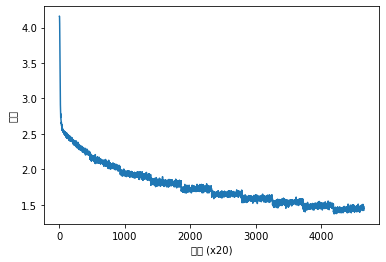

In [32]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ===============================================
# config.GPU = True
# ===============================================
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습 시작
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)


###  CBOW 모델 평가

In [34]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import most_similar, analogy
import pickle


pkl_file = 'cbow_params.pkl'
# pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 we: 0.71533203125
 i: 0.705078125
 your: 0.626953125
 they: 0.6171875
 anything: 0.59716796875

[query] year
 month: 0.83837890625
 week: 0.787109375
 spring: 0.767578125
 summer: 0.759765625
 decade: 0.697265625

[query] car
 truck: 0.6337890625
 luxury: 0.6328125
 auto: 0.5751953125
 window: 0.57421875
 cars: 0.55859375

[query] toyota
 honda: 0.658203125
 marathon: 0.6279296875
 coated: 0.62646484375
 engines: 0.61962890625
 seita: 0.61669921875


In [35]:
# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)

--------------------------------------------------

[analogy] king:man = queen:?
 a.m: 5.7421875
 woman: 5.50390625
 naczelnik: 5.10546875
 carolinas: 4.93359375
 hacker: 4.74609375

[analogy] take:took = go:?
 went: 4.6796875
 're: 4.45703125
 came: 4.4140625
 were: 4.07421875
 was: 4.0625

[analogy] car:cars = child:?
 a.m: 6.75390625
 rape: 5.875
 children: 5.3203125
 daffynition: 4.734375
 women: 4.5390625

[analogy] good:better = bad:?
 rather: 5.78125
 more: 5.73828125
 less: 5.40625
 greater: 4.5078125
 fewer: 4.1328125
